In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

Text(0, 0.5, 'amplitude')

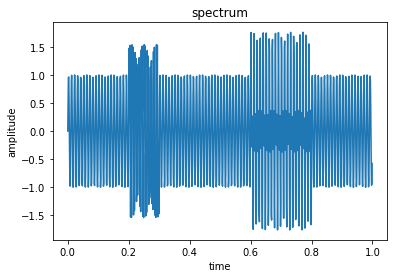

In [2]:
fs = 1024
t = np.arange(0, 1.0, 1.0 / fs)
features = [100,200,300]
intervals = [np.array([tt for tt in t]),
             np.array([tt if (0.6 < tt < 0.8) else 0 for tt in t]),
             np.array([tt if (0.2 < tt < 0.3) else 0 for tt in t]),
            ]
data = np.zeros(shape = (len(t),))
for i in range(len(features)):
    data += np.sin(2 * np.pi * features[i] * intervals[i])
plt.figure()
plt.plot(t,data)
plt.title("spectrum")
plt.xlabel("time")
plt.ylabel("amplitude")

Text(0, 0.5, 'amplitude')

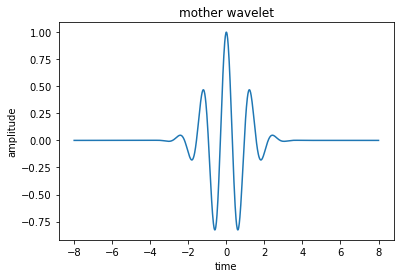

In [3]:
tw = np.linspace(-8,8,len(data))
w0 = 5
phi = np.exp(-tw ** 2 / 2) * np.cos(w0 * tw)
plt.figure()
plt.title("mother wavelet")
plt.plot(tw,phi)
plt.xlabel("time")
plt.ylabel("amplitude")

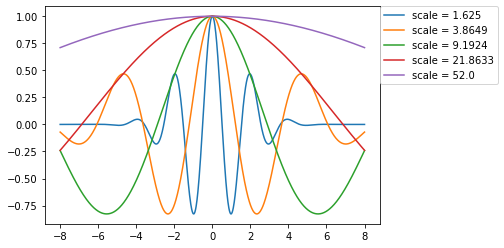

In [10]:
NV = 16
wc = 2 * np.pi * pywt.central_frequency('morl')
s0 = wc / np.pi
jmax = np.floor(np.log2(len(data) / (s0 * 2 * 8)) * NV)
scales = s0 * 2 ** (np.arange(0,jmax) / NV)
plt.figure()
for idx,s in enumerate(scales):
    if idx % 20 == 0:
        wavelet = np.exp(-(tw / s) ** 2 / 2) * np.cos(w0 * tw / s) 
        plt.plot(tw,wavelet,label = "scale = " + str(s.round(4)))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) 
plt.title("wavelets generated by different scales")

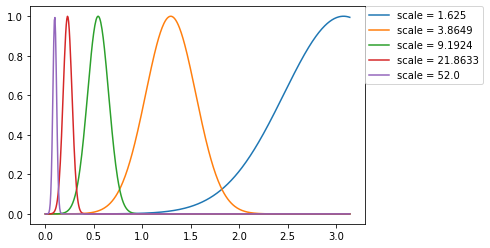

In [11]:
n = len(data) // 2
w = np.linspace(0, np.pi, n)
filter_bank = np.zeros(shape = (len(scales), n))

for idx, s in enumerate(scales):
    filter_bank[idx] = np.exp(-(s * w - w0) ** 2 / 2) 
'''
plt.figure()
for band_pass_filter in filter_bank:
    plt.plot(w, band_pass_filter)
'''
plt.figure()
for idx, band_pass_filter in enumerate(filter_bank):
    if idx % 20 == 0:
        plt.plot(w,band_pass_filter,label = "scale = " + str(scales[idx].round(4)))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title("filter bank")        


Text(0.5, 1.0, 'spectrogram')

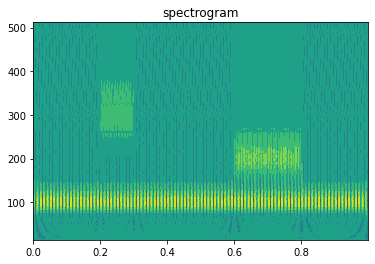

In [30]:
wavename = 'morl'
[spectrogram, frequencies] = pywt.cwt(data, scales, wavename, 1 / fs)
plt.figure()
plt.contourf(t,frequencies,spectrogram)
plt.title("spectrogram")
plt.xlabel('time')
plt.ylabel('frequency')